In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import *
import random
from scipy import optimize
import numpy as np

In [ ]:
# Task №1

In [ ]:
def modular(x):
  return abs(x - 0.2)

def cubic(x):
  return x ** 3

def sinf(x):
  return x * sin(1 / x) 

x = symbols('x')

In [ ]:
def brute_force_method(f, a, eps = 0.001, b = 1):

  n = int((b-a)/eps)
  x_k = [a+(b-a)*k/n for k in range(n+1)]

  min_x = x_k[0]
  min_f = float(f.subs(x, x_k[0]))

  iterations = 1
  calc_func = 1

  for i in range(1,len(x_k)):

    fun = float(f.subs(x, x_k[i]))

    if fun < min_f:
      min_x = x_k[i]
      min_f = fun

    iterations += 1
    calc_func += 1

  return min_x, calc_func, iterations


brute_force_method(modular(x), 0)

(0.2, 1001, 1001)

In [ ]:
def dichotomy_method(f, a, eps = 0.001, b = 1, delta = 0.001 / 2):

  iterations = 0
  calc_func = 0

  while abs(a - b) >= eps:

    x_1 = (a + b - delta) / 2
    x_2 = (a + b + delta) / 2

    if float(f.subs(x, x_1)) <= float(f.subs(x, x_2)):
      b = x_2
    else:
      a = x_1

    iterations += 1
    calc_func += 2

  return 'x∈['+str(a)+','+str(b)+']', calc_func, iterations


dichotomy_method(modular(x), 0)

('x∈[0.19960717773437495,0.20059521484374995]', 22, 11)

In [ ]:
def golden_section_method(f, a, eps = 0.001, b = 1):

  x_1 = a + (3 - 5 ** (1/2)) * (b - a) / 2
  x_2 = b + (5 ** (1/2) - 3) * (b - a) / 2
  func_x_1 = float(f.subs(x, x_1))
  func_x_2 = float(f.subs(x, x_2))

  iterations = 0
  calc_func = 2

  while abs(a - b) >= eps:

    if func_x_1 <= func_x_2:
      b = x_2
      x_2 = x_1
      x_1 = a + (3 - 5 ** (1/2)) * (b - a) / 2
      func_x_2 = func_x_1
      func_x_1 = float(f.subs(x, x_1))
    else:
      a = x_1
      x_1 = x_2
      x_2 = b + (5 ** (1/2) - 3) * (b - a) / 2
      func_x_1 = func_x_2
      func_x_2 = float(f.subs(x, x_2))

    iterations += 1
    calc_func += 1

  return 'x∈['+str(a)+','+str(b)+']', calc_func, iterations


golden_section_method(modular(x), 0)

('x∈[0.199706745025657,0.2004398824615144]', 17, 15)

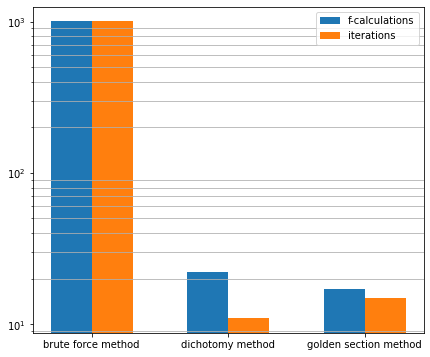

In [ ]:
cat_par = ['brute force method','dichotomy method','golden section method']
g1 = [brute_force_method(modular(x), 0)[1],dichotomy_method(modular(x), 0)[1],golden_section_method(modular(x), 0)[1]]
g2 = [brute_force_method(modular(x), 0)[2],dichotomy_method(modular(x), 0)[2],golden_section_method(modular(x), 0)[2]]
width = 0.3
p = np.arange(len(cat_par))
fig, ax = plt.subplots(figsize=(7,6))
plt.yscale('log')
rects1 = ax.bar(p - width/2, g1, width, label='f-calculations')
rects2 = ax.bar(p + width/2, g2, width, label='iterations')
#ax.set_title('Quantitative characteristics for calculations of f(x)=|x-0.2| with precision $\epsilon = 10^{-3}$')
ax.set_xticks(p)
ax.set_xticklabels(cat_par)
ax.legend()
ax.grid(which='minor')

In [ ]:
# Task №2

In [ ]:
alpha = random.random()
betta = random.random()

x_k = [k/100 for k in range(101)]
y_k = [alpha*x_k[i] + betta + random.normalvariate(0,1) for i in range(101)]

In [ ]:
def linear_apr(args, x_arr, y_arr):
    return sum([(x_k[i] * args[0] + args[1] - y_k[i]) ** 2 for i in range(101)])

def rational_apr(args, x_arr, y_arr):
    return sum([(args[0] / (args[1] * x_k[i] + 1) - y_k[i]) ** 2 for i in range(101)])

In [ ]:
def Brute_Force_method(f, left, right, eps = 0.001):

  D_min = f([right,right],x_k,y_k)
  a_min = right
  b_min = right

  iterations = 0
  calc_func = 1

  for i in np.arange(left, right, eps):
    for j in np.arange(left, right, eps):
      if i != 0 and j != 0:

        D = f([i,j],x_k,y_k)
        calc_func += 1

        if D < D_min:
          D_min = D
          a_min, b_min = i, j

        iterations += 1

  return a_min, b_min, calc_func, iterations

In [ ]:
x, a1, b1 = symbols('x a1 b1')

def Gauss_method(f, a = 0.5, b = 0.5, eps = 0.001):

  def scalar_a(a):
    return sum([(float(f.subs([(x,x_k[i]),(a1,a),(b1,b)])) - y_k[i]) ** 2 for i in range(101)])

  def scalar_b(b):
    return sum([(float(f.subs([(x,x_k[i]),(a1,a),(b1,b)])) - y_k[i]) ** 2 for i in range(101)])

  D_prev = sum([(float(f.subs([(x,x_k[i]),(a1,a),(b1,b)])) - y_k[i]) ** 2 for i in range(101)])
  res = optimize.minimize_scalar(scalar_a)
  a = res['x']
  D = sum([(float(f.subs([(x,x_k[i]),(a1,a),(b1,b)])) - y_k[i]) ** 2 for i in range(101)])

  iterations = 1
  calc_func = 2
  calc_func_inner = res.nfev

  while abs(D - D_prev) >= eps:

    if iterations % 2 == 0:
      res = optimize.minimize_scalar(scalar_a)
      a = res['x']
      calc_func_inner += res.nfev
    else:
      res = optimize.minimize_scalar(scalar_b)
      b = res['x']
      calc_func_inner += res.nfev
    
    D_prev = D
    D = sum([(float(f.subs([(x,x_k[i]),(a1,a),(b1,b)])) - y_k[i]) ** 2 for i in range(101)])

    calc_func += 2

    iterations += 1

  return a, b, calc_func + calc_func_inner,iterations

In [ ]:
def Nelder_Mead_method(func, x_arr, y_arr, initial_aprox = [0.5, 0.5], eps = 0.001, disp = False):
    
    res = optimize.minimize(func, initial_aprox, args = (x_arr, y_arr), method = 'nelder-mead', options = {'xatol': eps, 'disp': disp})
    
    return res.x[0], res.x[1], res.nfev, res.nit

In [ ]:
GM_r = Gauss_method(a1 / (1 + b1 * x))
GM_l = Gauss_method(a1 * x + b1)
NM_r = Nelder_Mead_method(rational_apr, x_k, y_k)
NM_l = Nelder_Mead_method(linear_apr, x_k, y_k)
BF_r = Brute_Force_method(rational_apr, -1, 1)
BF_l = Brute_Force_method(linear_apr, -1, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


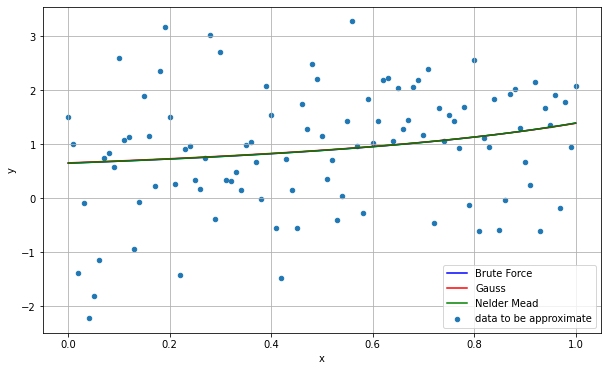

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x_k,y_k,label='data to be approximate', s=20)
plt.plot(x_k, [BF_r[0] / (x_k[i] * BF_r[1] + 1) for i in range(101)], label='Brute Force', color='blue')
plt.plot(x_k, [GM_r[0] / (x_k[i] * GM_r[1] + 1) for i in range(101)], label='Gauss', color='red')
plt.plot(x_k, [NM_r[0] / (x_k[i] * NM_r[1] + 1) for i in range(101)], label='Nelder Mead', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

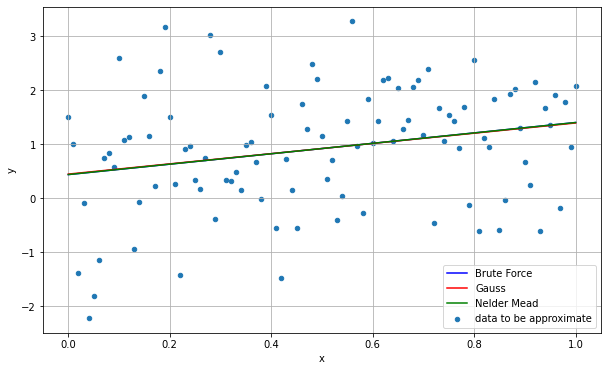

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x_k,y_k,label='data to be approximate', s=20)
plt.plot(x_k, [x_k[i] * BF_l[0] + BF_l[1] for i in range(101)], label='Brute Force', color='blue')
plt.plot(x_k, [x_k[i] * GM_l[0] + GM_l[1] for i in range(101)], label='Gauss', color='red')
plt.plot(x_k, [x_k[i] * NM_l[0] + NM_l[1] for i in range(101)], label='Nelder Mead', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [ ]:
import pandas as pd

In [ ]:
# f-calculations
pd.DataFrame([ [BF_r[2], GM_r[2], NM_r[2]], [BF_l[2], GM_l[2], NM_l[2]] ], index = ['rational', 'linear'], columns = ['Brute Force', 'Gauss', 'Nelder Mead'])

,Brute Force,Gauss,Nelder Mead
rational,4000001,419,67
linear,4000001,183,54


In [ ]:
# iterations
pd.DataFrame([ [BF_r[3], GM_r[3], NM_r[3]], [BF_l[3], GM_l[3], NM_l[3]] ], index = ['rational', 'linear'], columns = ['Brute Force', 'Gauss', 'Nelder Mead'])

,Brute Force,Gauss,Nelder Mead
rational,4000000,24,36
linear,4000000,14,29
